# Data Processing

The primary goal is to process resistivity data. Firstly, it is necessary to import the required libraries.


In [4]:
import csv
import utm
import fiona
import numpy as np
import pandas as pd
import pygimli as pg
import seaborn as sns
import geopandas as gpd
from scipy import interpolate
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from pygimli.frameworks import harmfit
from sklearn.ensemble import IsolationForest
from matplotlib.backends.backend_pdf import PdfPages
from Data_Processing import DataProcessing
from Data_Processing import LineDetector

Now is the appropriate time to create an instance of DataProcessing, define file paths and names, and then extract reference point locations from the KML file.

In [48]:
# Create an instance of DataProcessing
data_processor = DataProcessing()  

# Define file paths and names
filepath_Original = 'TRB_Wertheim_Geophilus_roh_221125.csv'
farmName_Original = 'Trebbin Wertheim_Processed'

# Import reference points from KML file
kmlFile = 'TRB_Wertheim_Referenzpunkte_gemessen_2022-12-01.kml'
refPoints = data_processor.import_reference_points_from_kml(kmlFile, filepath_Original)

Reference points saved to TRB_Wertheim_Geophilus_roh_221125.csv_farm_reference_Points.csv


Henceforth, we shall utilize the predefined data processing class to conduct the preprocessing in a systematic manner, proceeding step by step.

In [9]:
# Define spacing labels
spacing_labels = ['Spacing 1', 'Spacing 2', 'Spacing 3', 'Spacing 4', 'Spacing 5']

# Read original data
data_original = data_processor.read_data(filepath_Original)
downsampled_data = data_original[::2]

Line detection algorithms identify and categorize individual data points belonging to specific resistivity profiles or lines, facilitating further analysis. 

Number of valid lines detected:  31
Number of invalid lines (containing less than 10 points):  90
Number of detected lines:  31


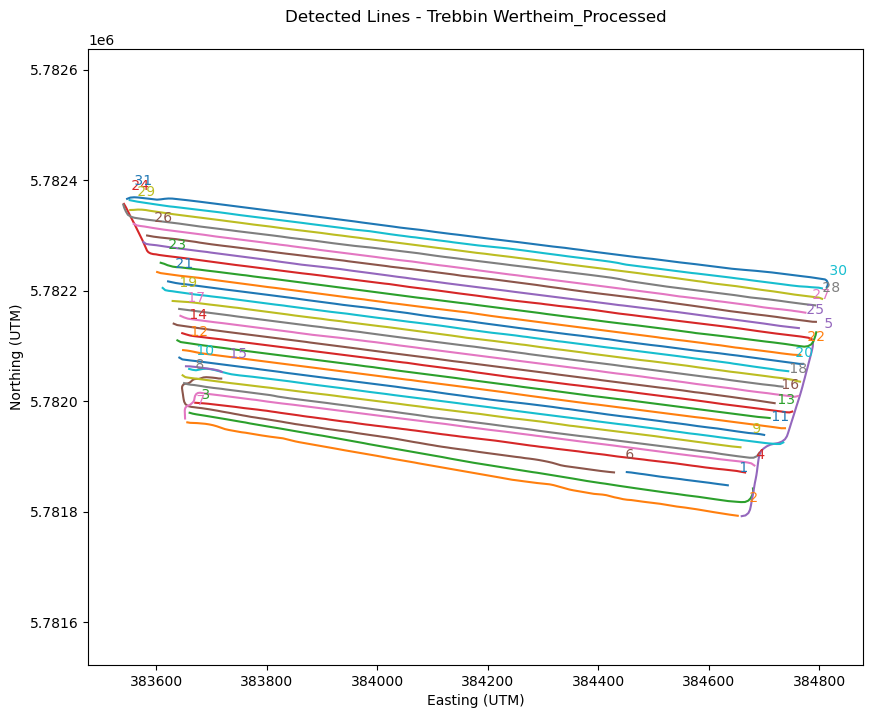

In [11]:
# Line detection and assign one line to each point
minPoints = 10
maxAngleDeviation = 31
data_line_assigned = data_processor.line_detection_and_assign_lines(downsampled_data, farmName_Original, minPoints, maxAngleDeviation)
    
# Plot detected lines
data_processor.plot_detected_lines(data_line_assigned, farmName_Original, refPoints)

We are now able to plot the original resistivity data for each spacing.

08/03/24 - 11:55:03 - pyGIMLi - INFO - Retrieving file from geodatenzentrum.de using URL: https://sgx.geodatenzentrum.de/wms_dop40__8102b4d5-7fdb-a6a0-d710-890a1caab5c3?service=wms&version=1.3.0&request=GetMap&Layers=rgb&STYLES=default&CRS=EPSG:25833&bbox=383476,5781763,384879,5782403&width=2500&Height=1142&Format=image/jpeg
C:\Users\Roudsari.S\AppData\Local\Temp\ipykernel_10256\4078569373.py:276: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


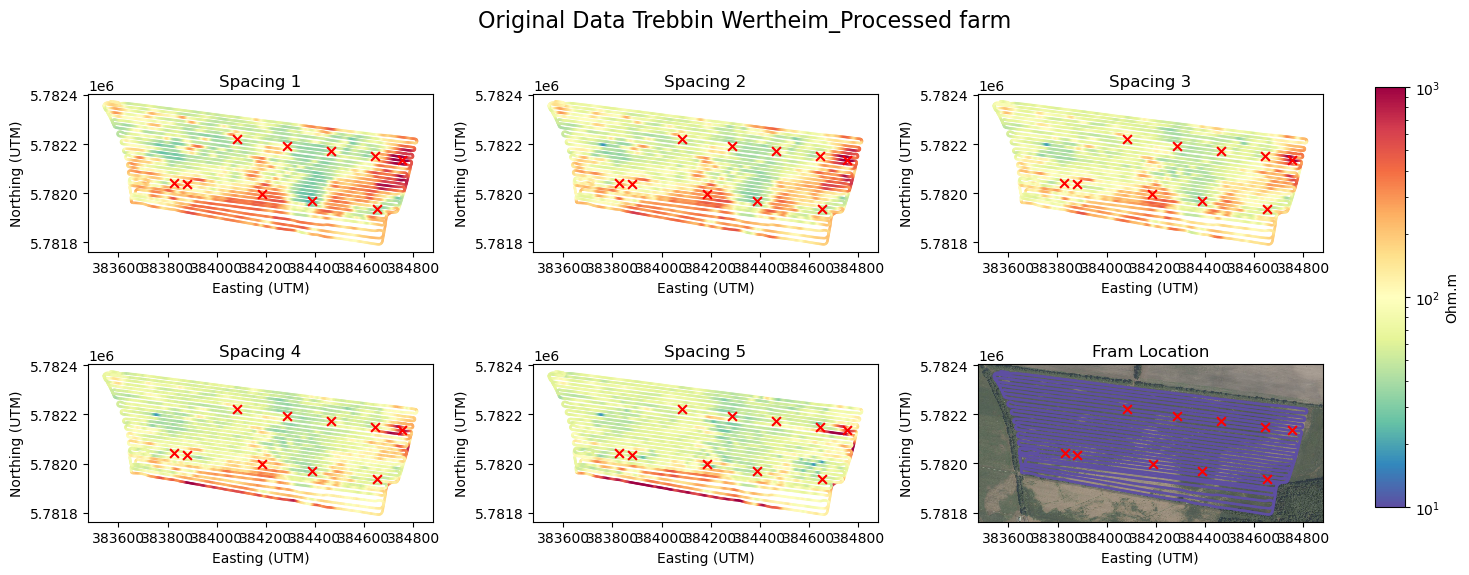

In [13]:
# Plot original data's areal plot
data_type_org = 'Original'
data_org = data_processor.plot_data_subplots(filepath_Original, spacing_labels, farmName_Original, refPoints, data_type_org)

Now, we can proceed to apply the Local Outlier Factor (LOF) algorithm to the original data.

C:\Program Files\software\Anaconda\lib\site-packages\sklearn\neighbors\_lof.py:284: UserWarning: n_neighbors (15) is greater than the total number of samples (10). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(


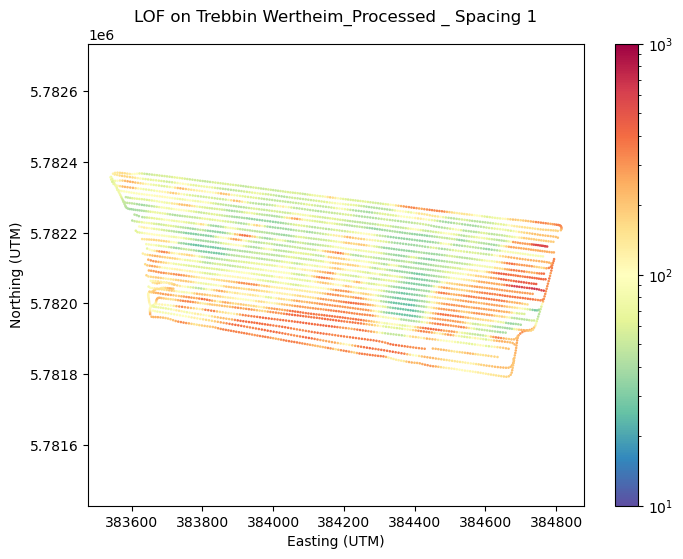

C:\Program Files\software\Anaconda\lib\site-packages\sklearn\neighbors\_lof.py:284: UserWarning: n_neighbors (15) is greater than the total number of samples (10). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(


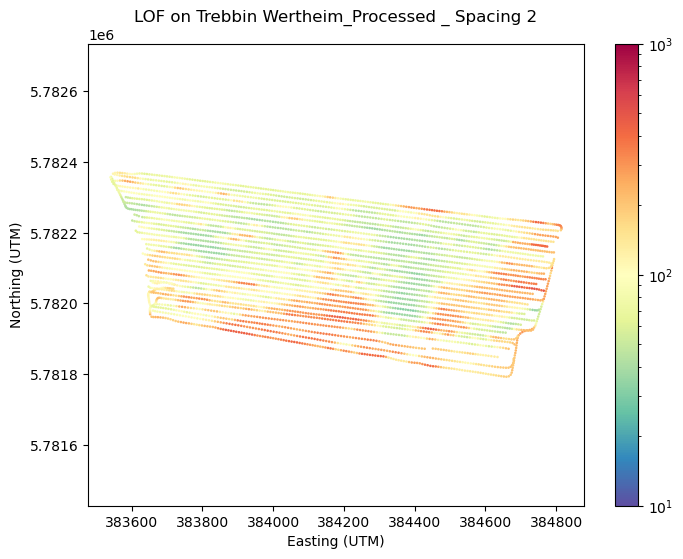

C:\Program Files\software\Anaconda\lib\site-packages\sklearn\neighbors\_lof.py:284: UserWarning: n_neighbors (15) is greater than the total number of samples (10). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(


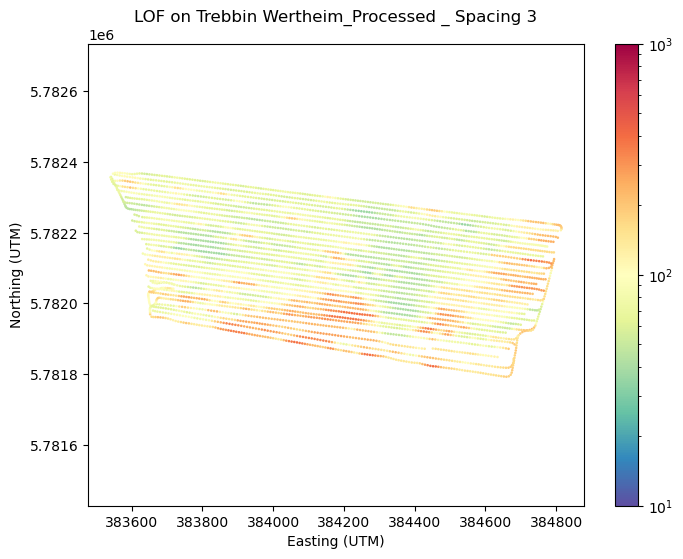

C:\Program Files\software\Anaconda\lib\site-packages\sklearn\neighbors\_lof.py:284: UserWarning: n_neighbors (15) is greater than the total number of samples (10). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(


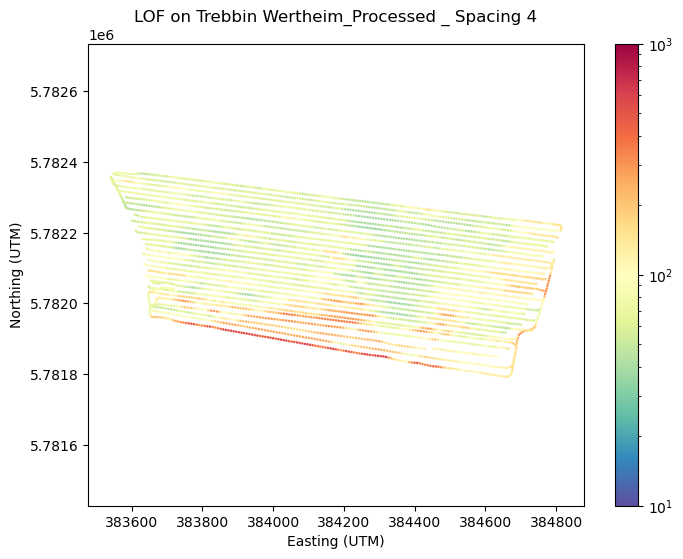

C:\Program Files\software\Anaconda\lib\site-packages\sklearn\neighbors\_lof.py:284: UserWarning: n_neighbors (15) is greater than the total number of samples (10). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(


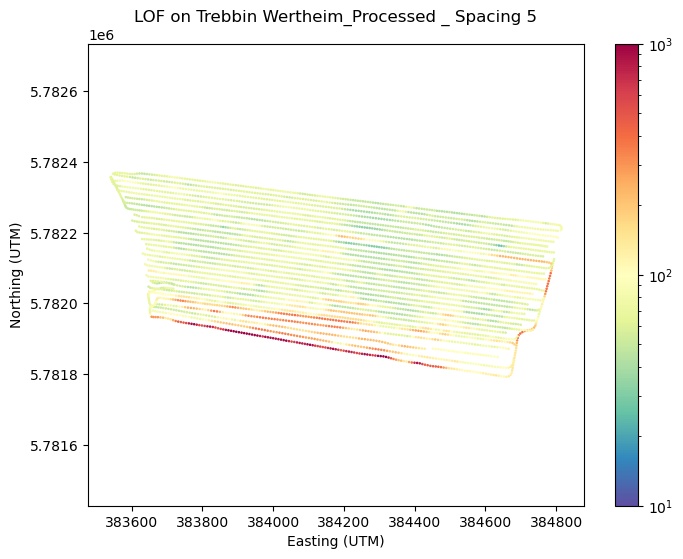

In [45]:
# Perform harmfit on original and draw areal plots
data_lineIndexed_file = f"data_lineIndexed_{farmName_Original}.txt"
LOF = data_processor.LOF_outliers(data_lineIndexed_file, spacing_labels, refPoints, farmName_Original)

We are now prepared to apply a curve-fitting method utilizing PyGIMLi, specifically the Harmfit algorithm, which employs harmonic functions, to the LOF data. This will enable us to achieve a smoother dataset.

In [50]:
# Harmfit on LOF
LOF_data_file = f"LOF_{farmName_Original}.txt"
data_type_LOF = 'LOF'
harmfit_onLOF = data_processor.harmfit_fn(LOF_data_file, spacing_labels, farmName_Original, refPoints, data_type_LOF)

08/03/24 - 12:21:23 - pyGIMLi - INFO - Found image file: DOP383476,5781763,384879,5782398.jpg
C:\Users\Roudsari.S\AppData\Local\Temp\ipykernel_10256\257307039.py:334: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


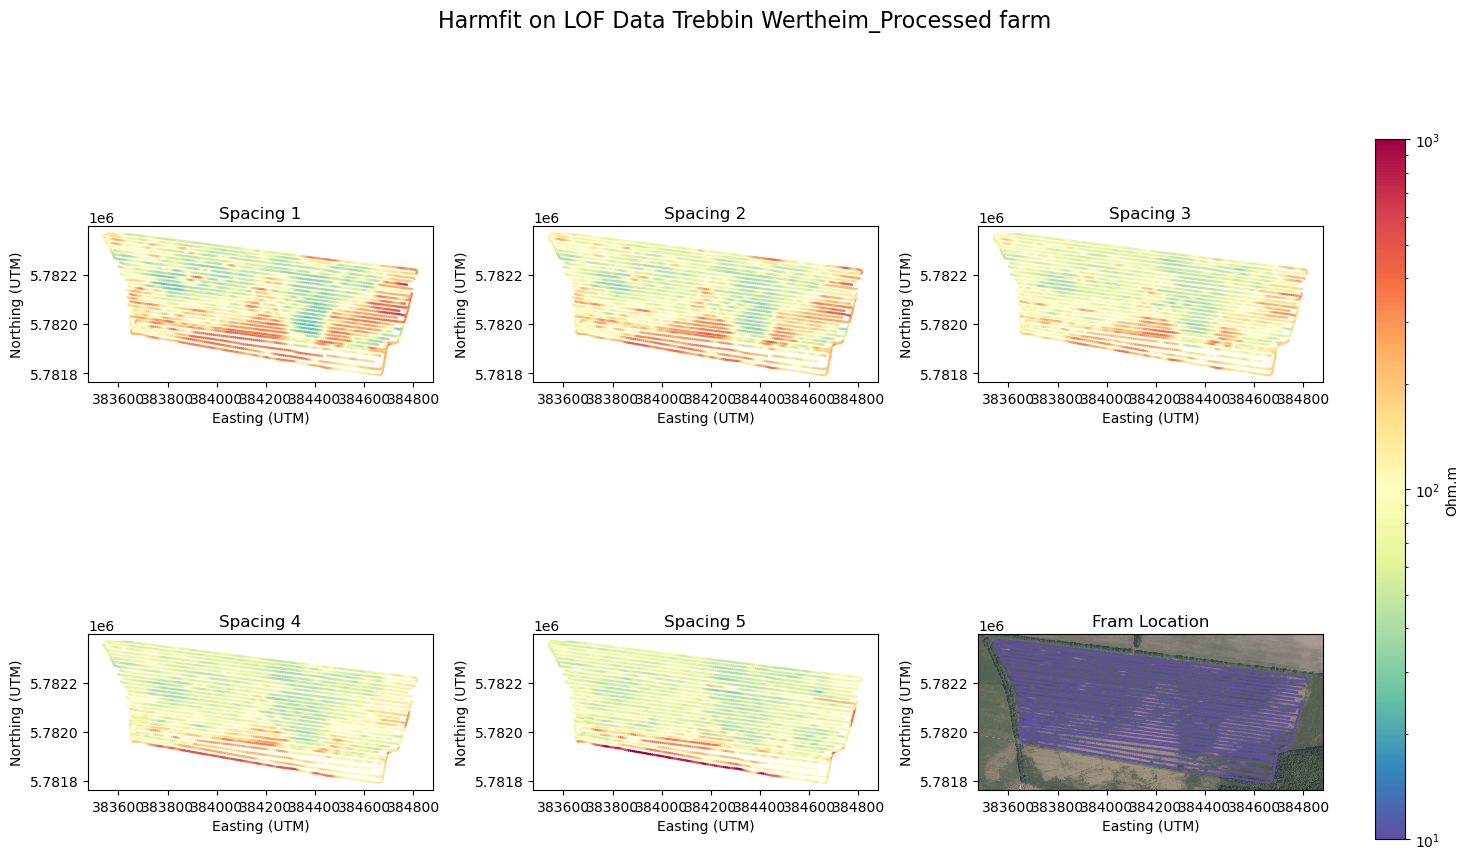

In [30]:
# Subplot plot HLOF
harmfit_onLOF_file = f"harmfitted_{data_type_LOF}_{farmName_Original}.txt"
data_harmfit_LOF = data_processor.plot_procesed_subplots(harmfit_onLOF_file, spacing_labels, farmName_Original, refPoints, data_type_LOF)

Here, we can compare the results of our outlier detection and smoothing process with the original data in each profile.

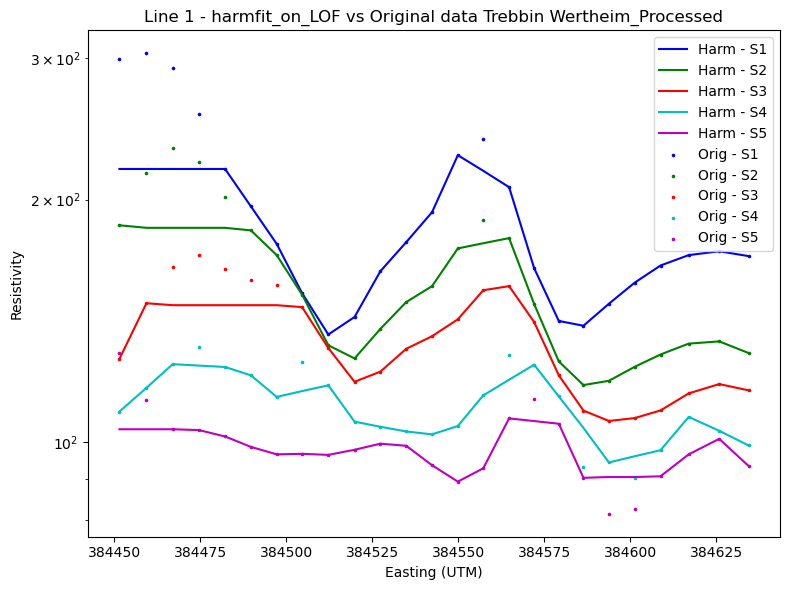

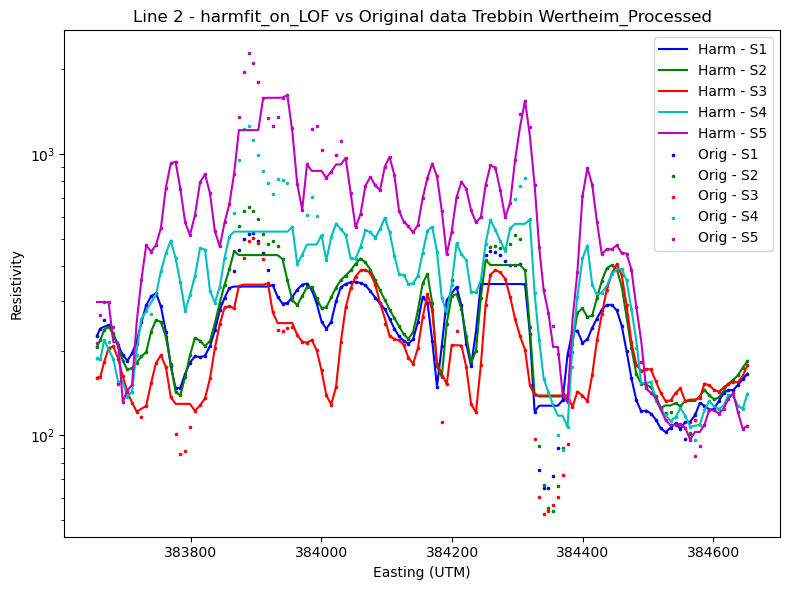

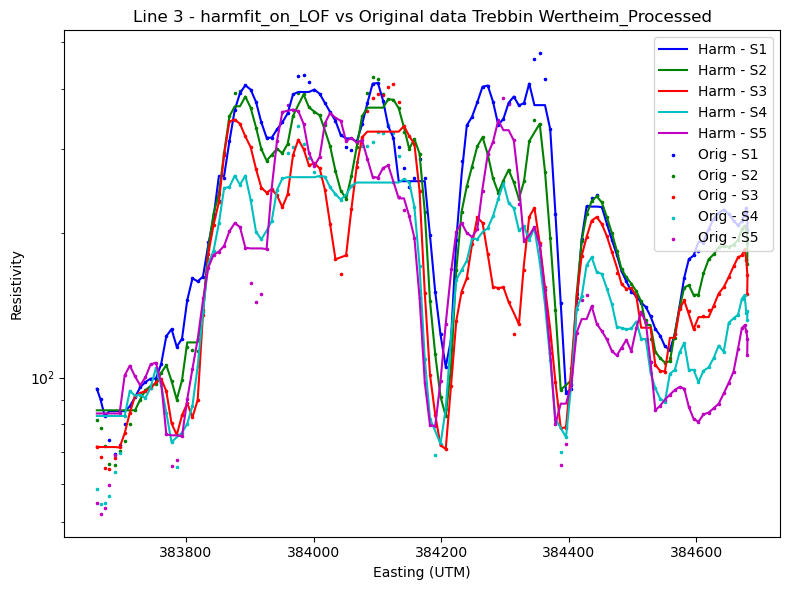

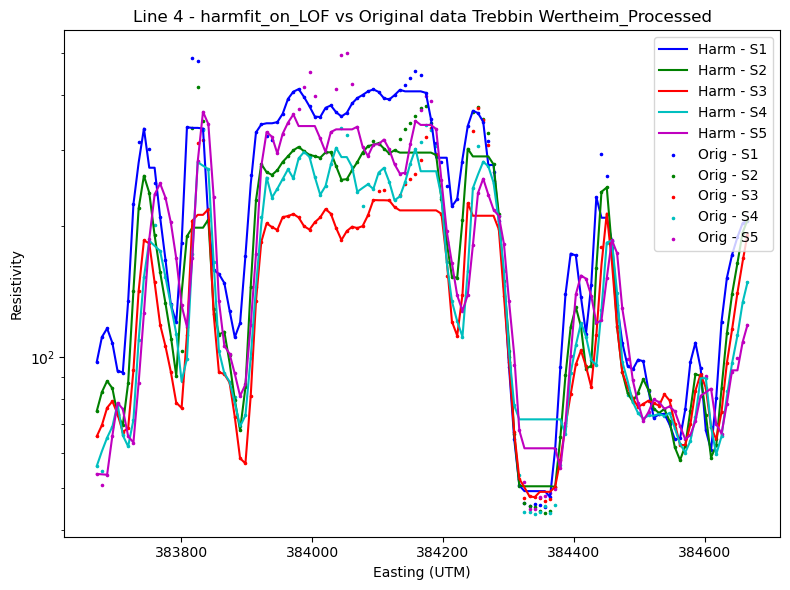

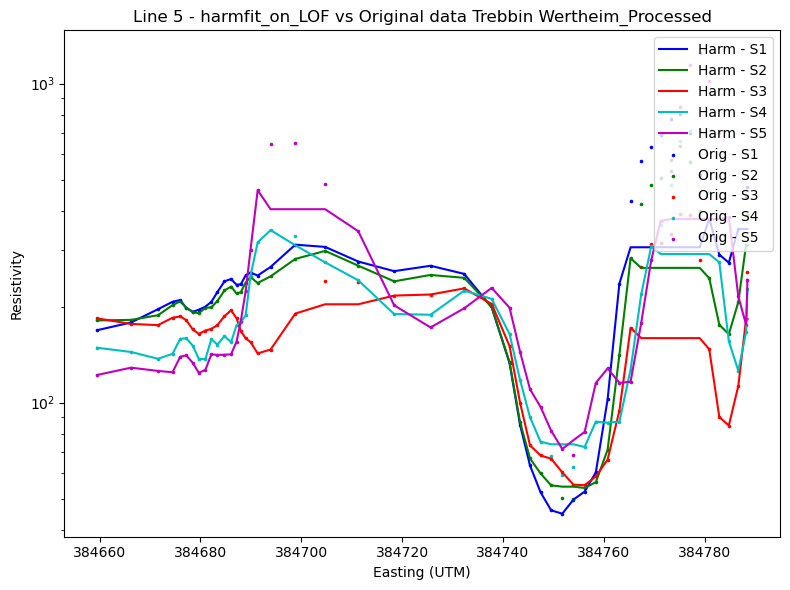

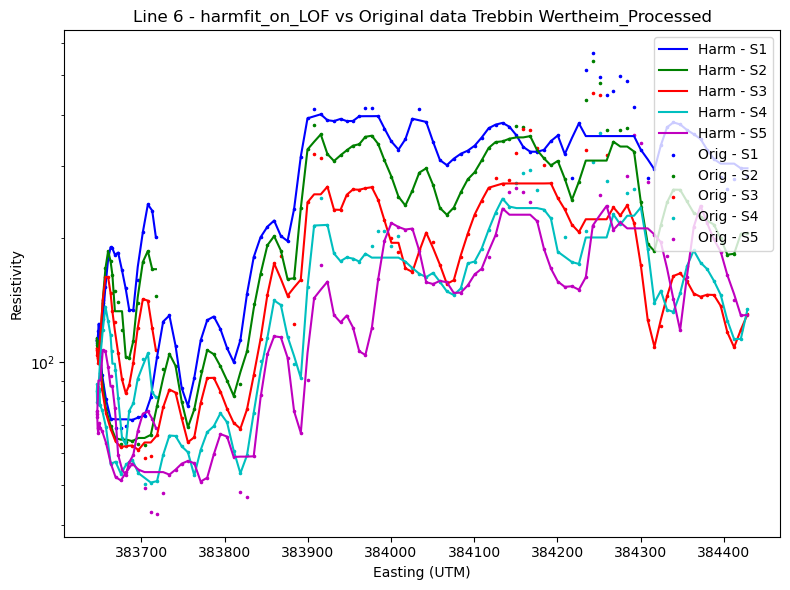

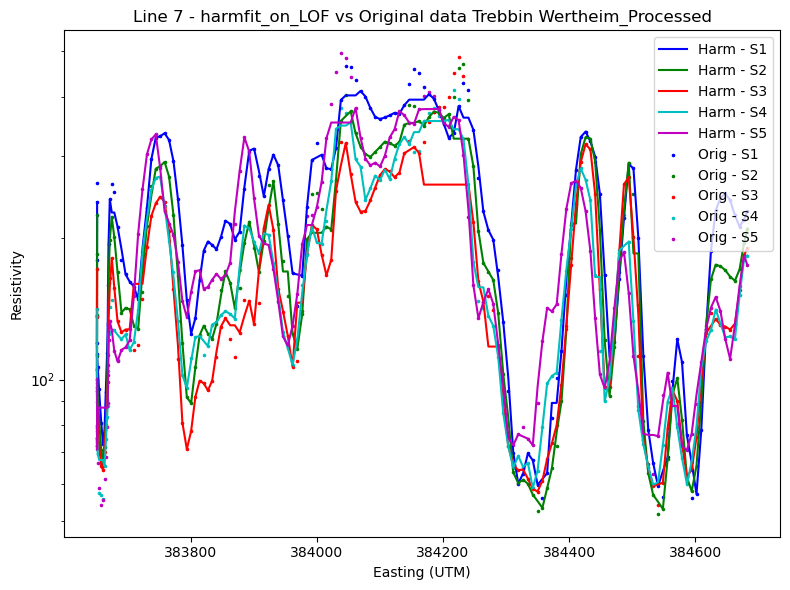

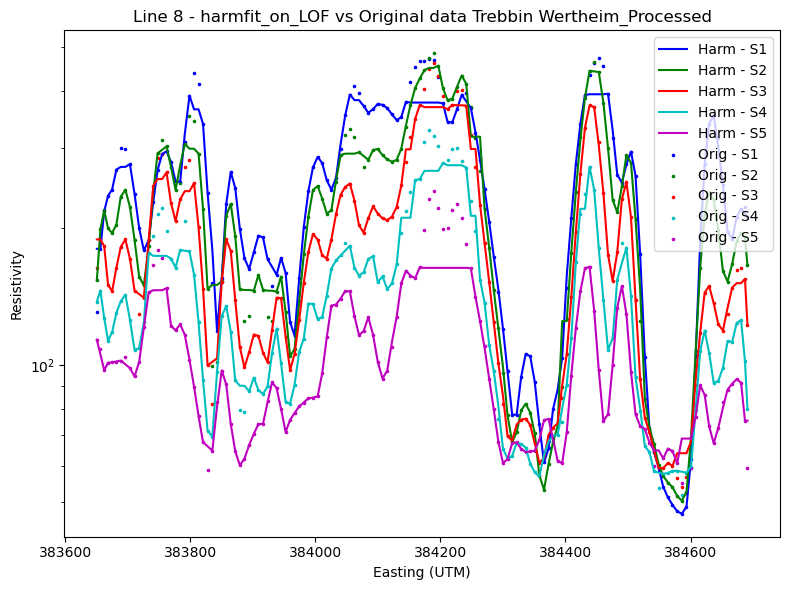

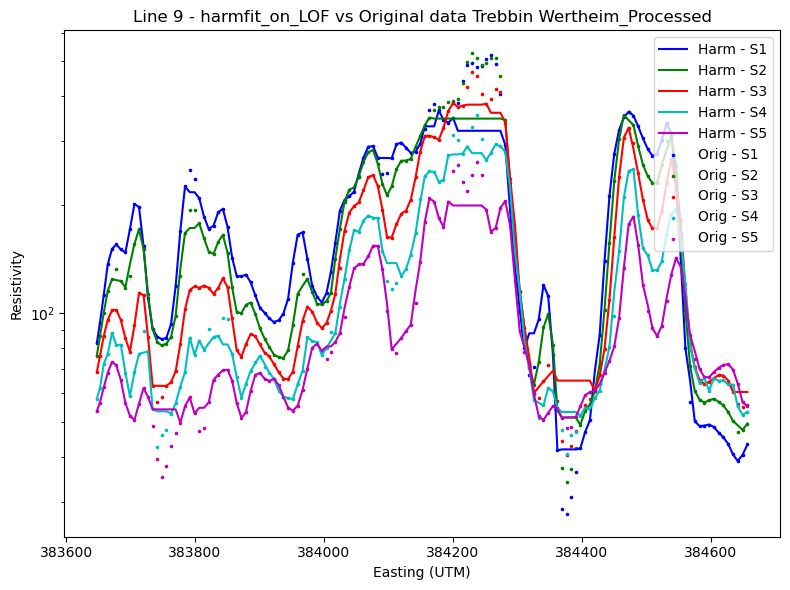

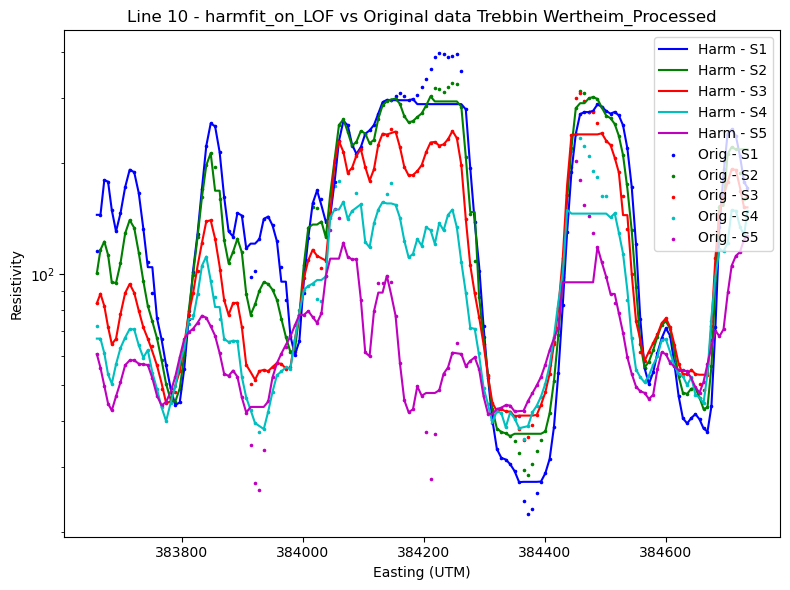

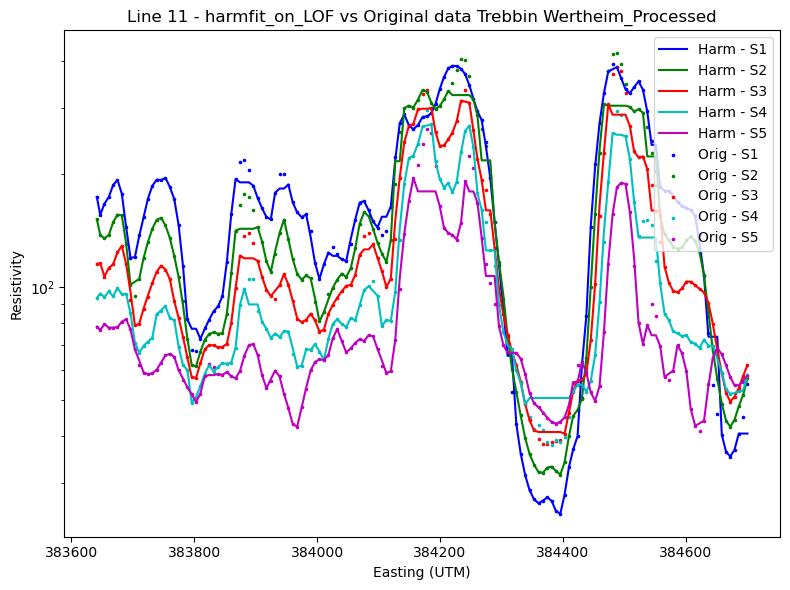

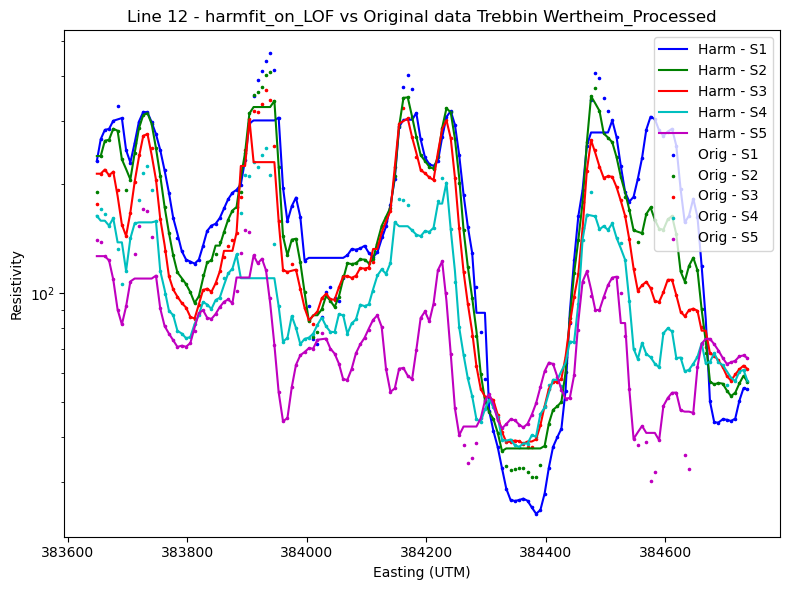

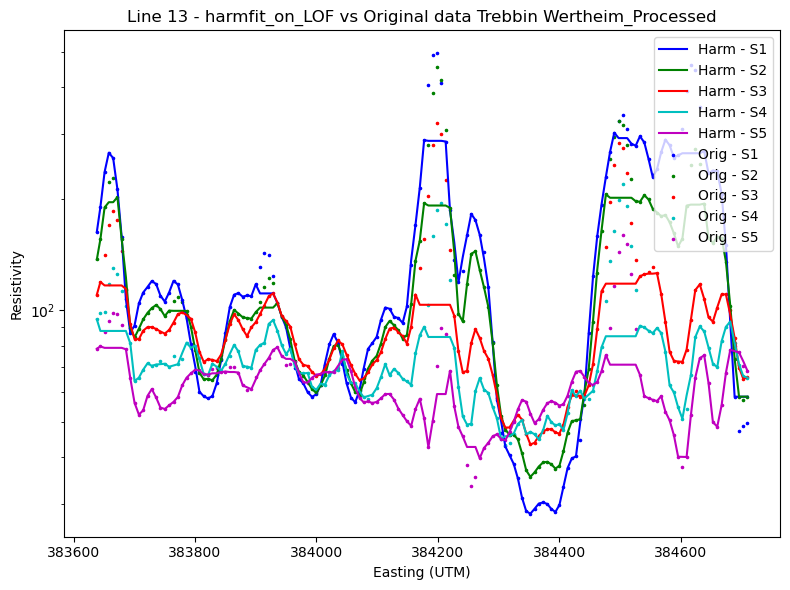

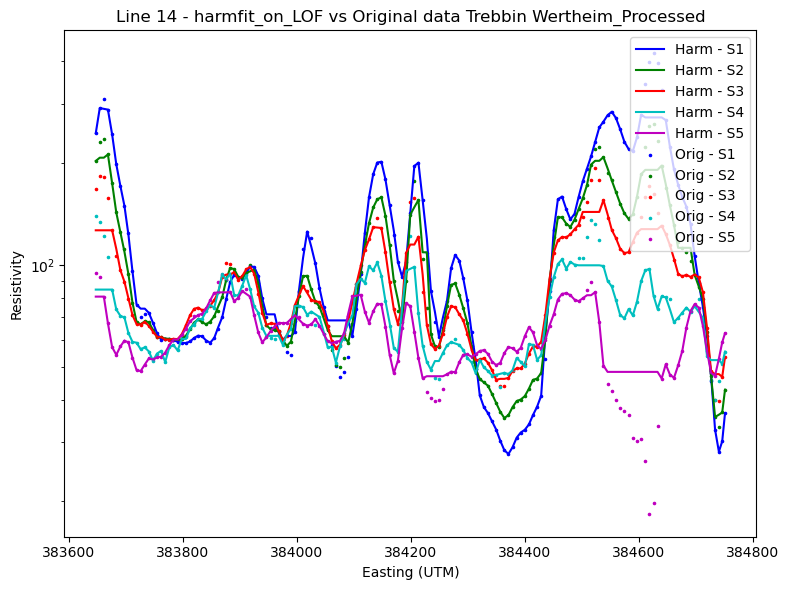

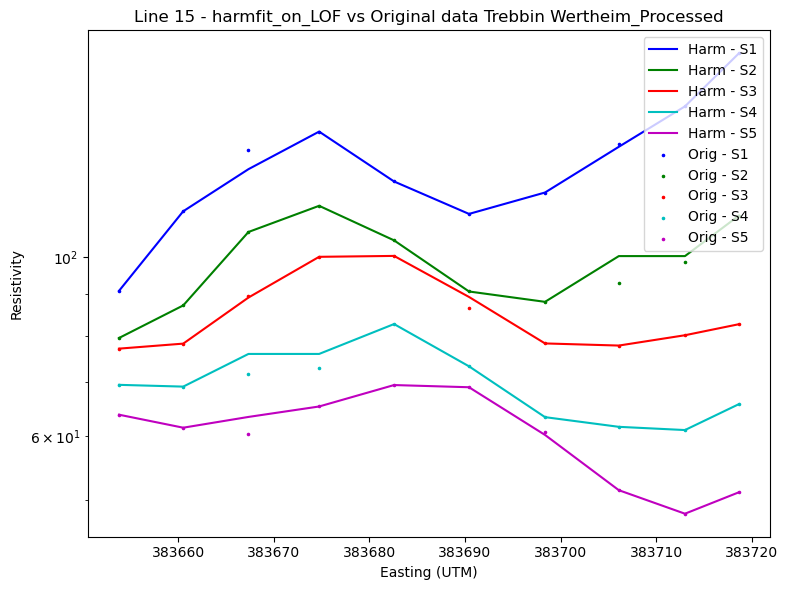

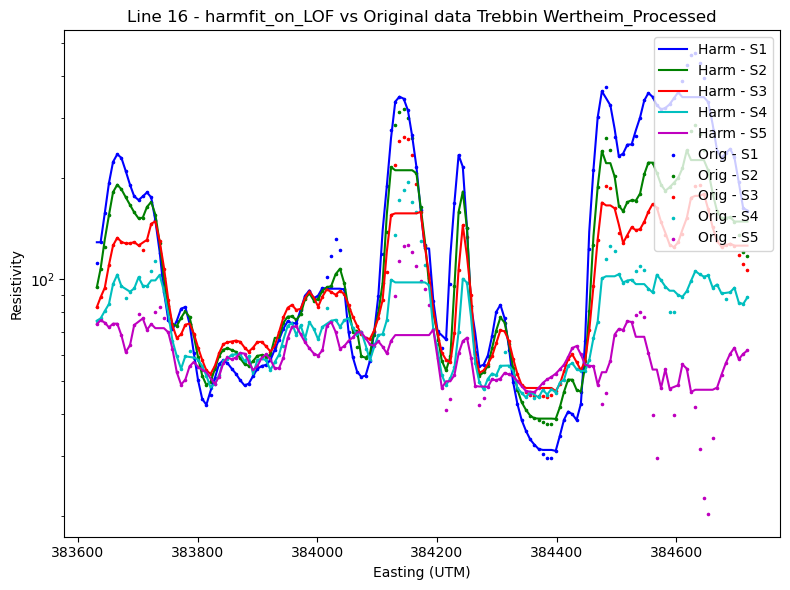

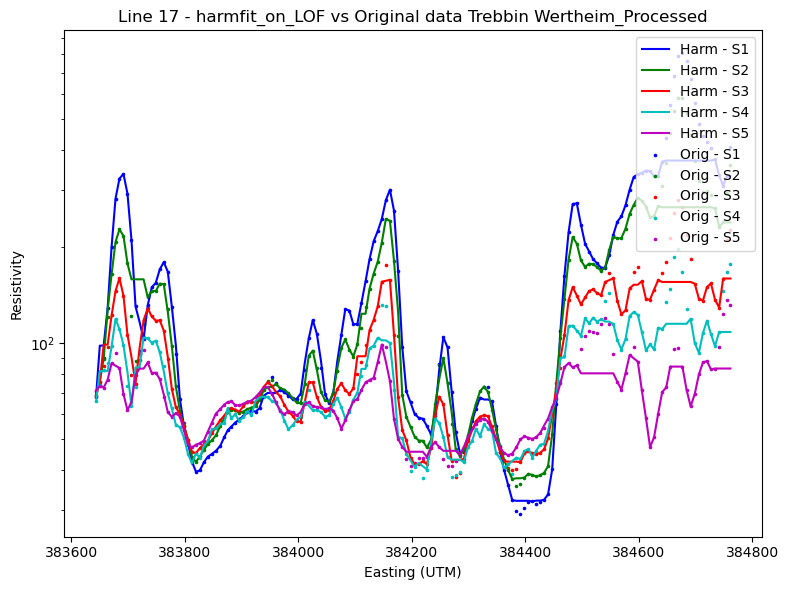

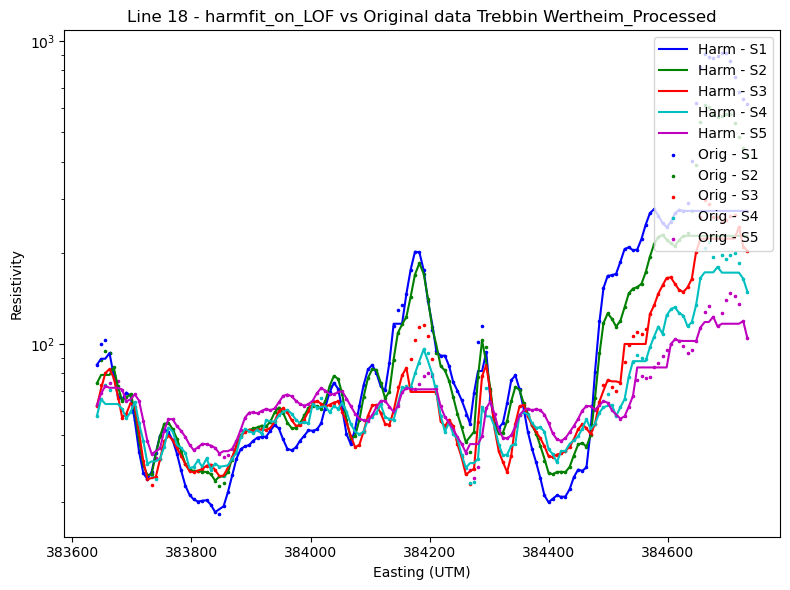

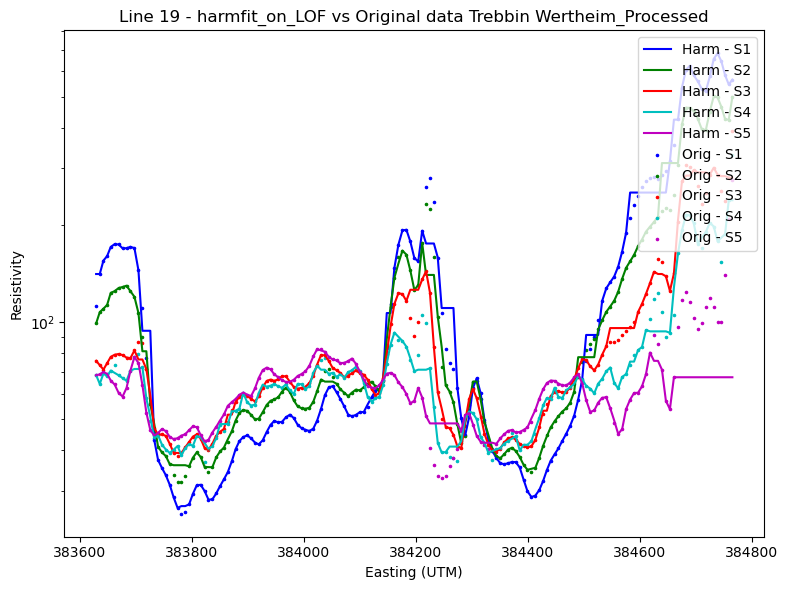

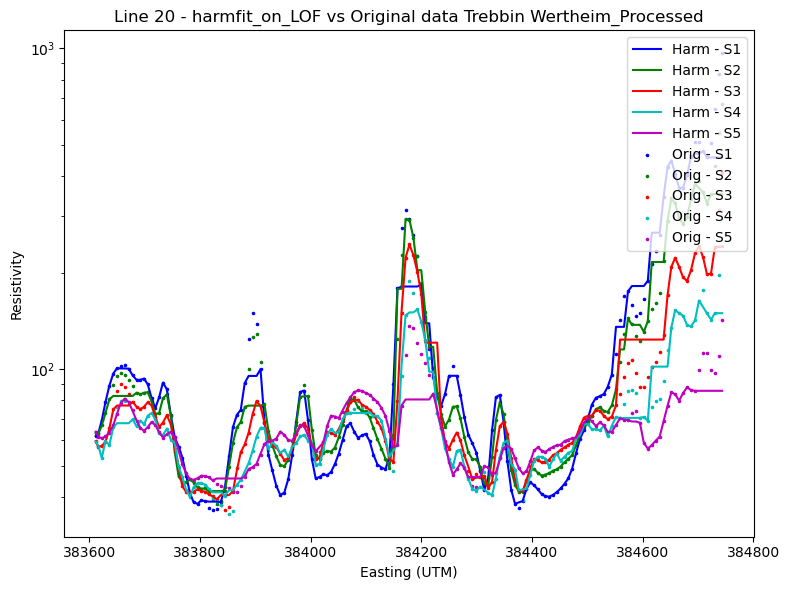

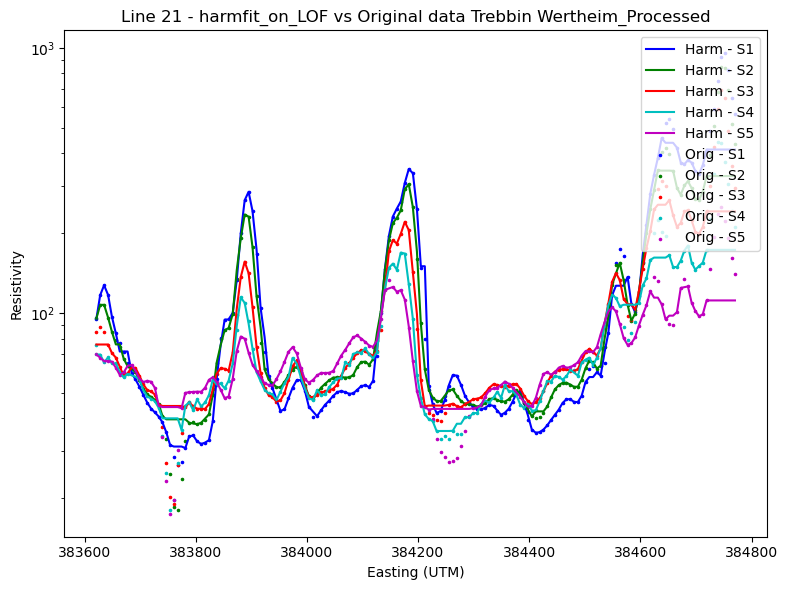

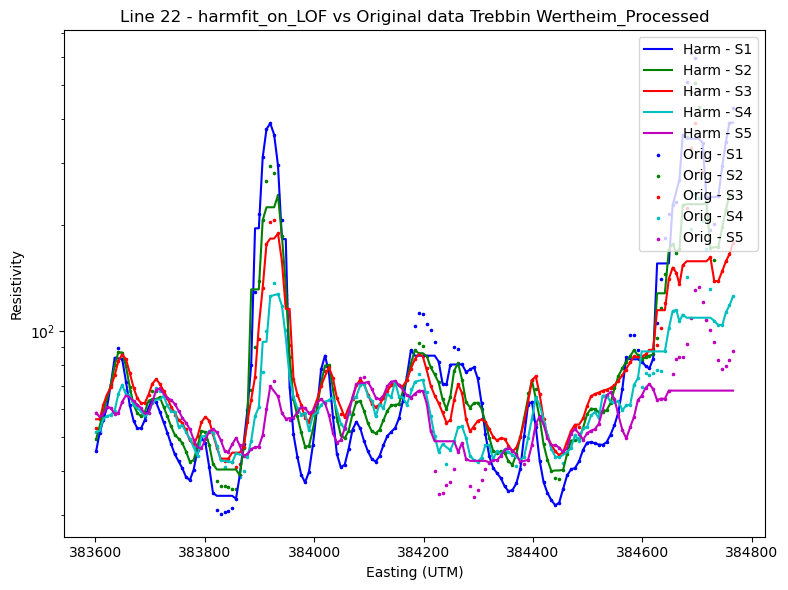

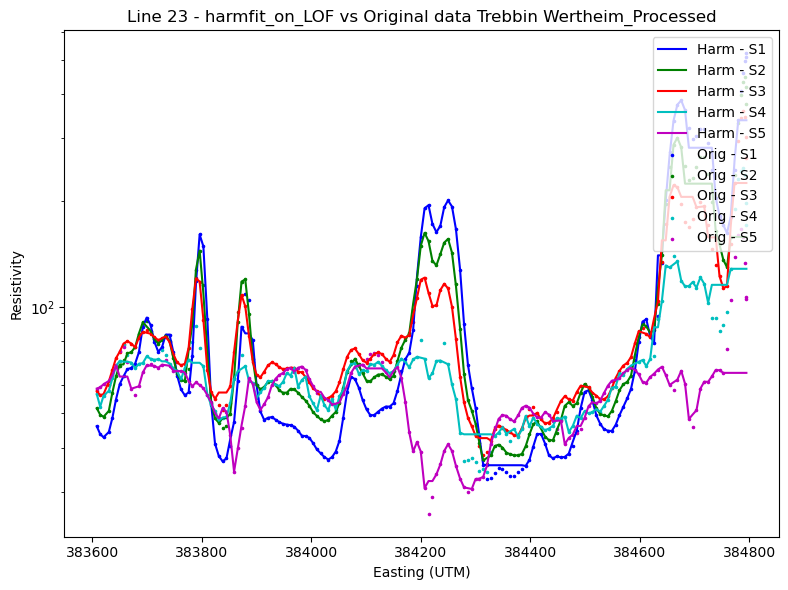

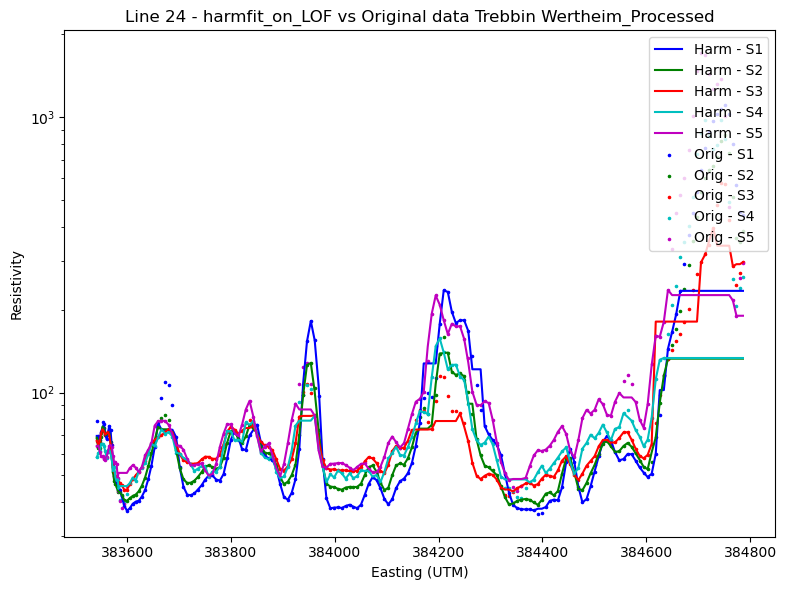

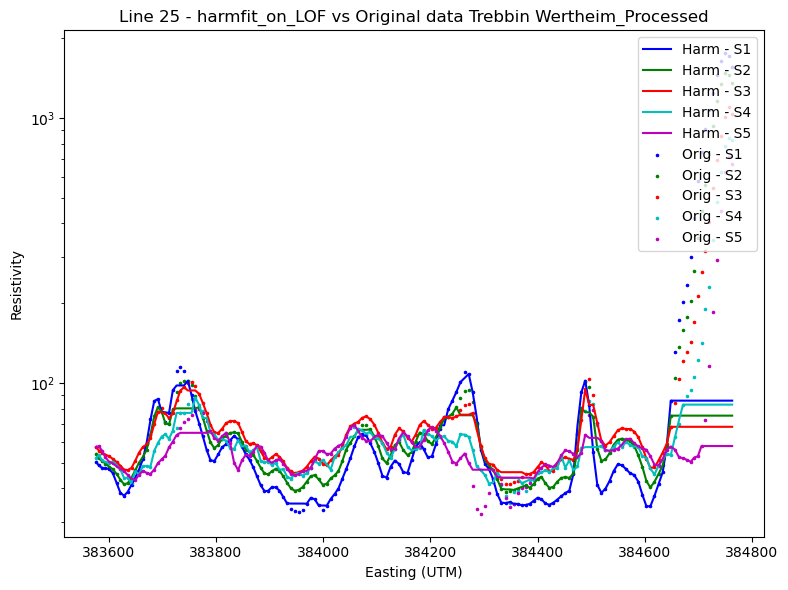

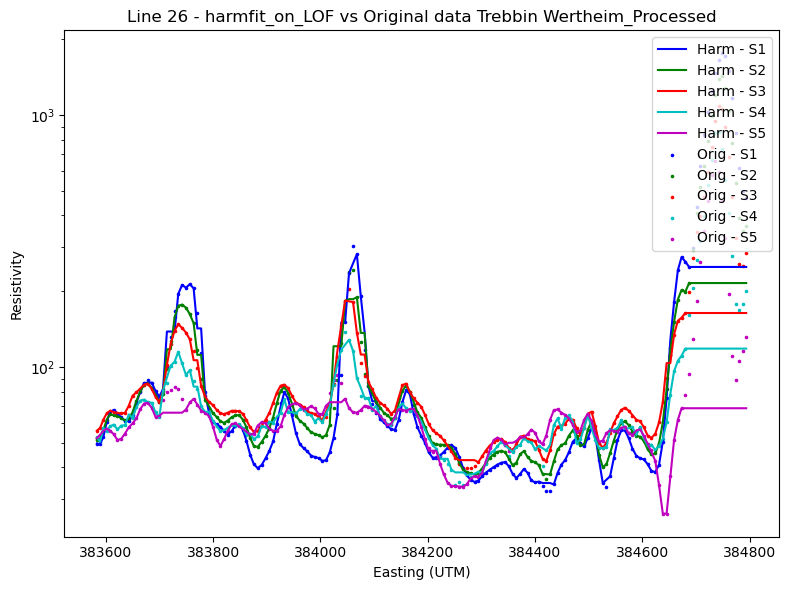

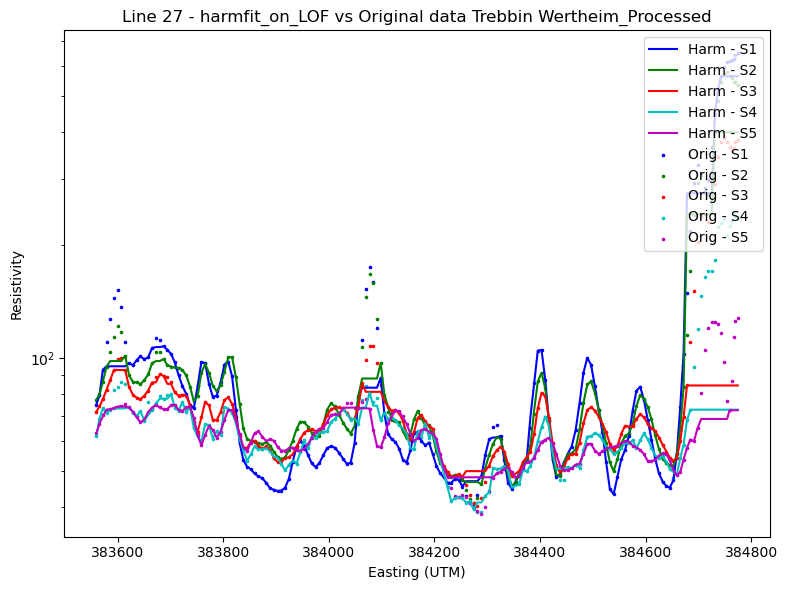

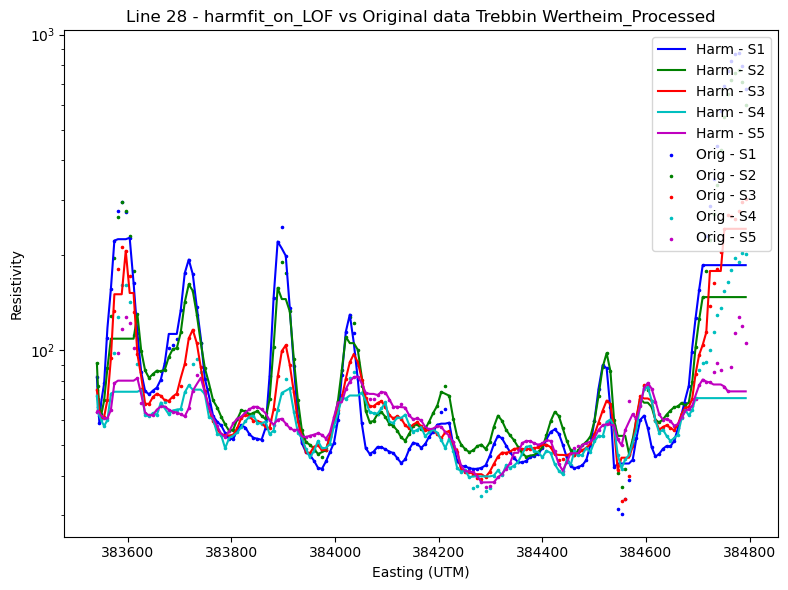

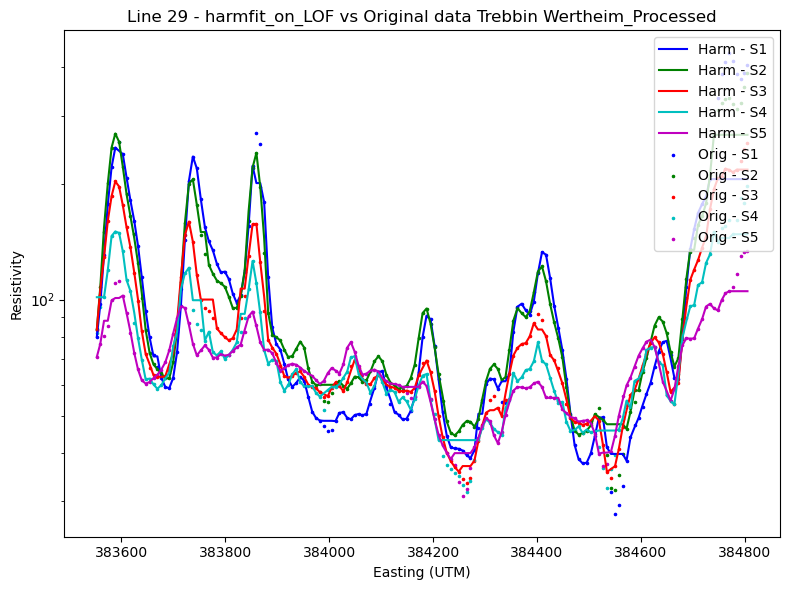

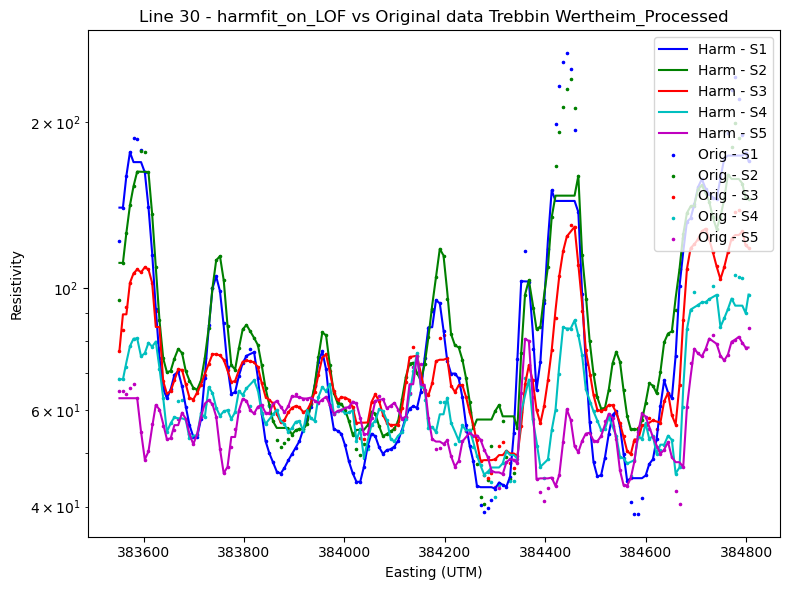

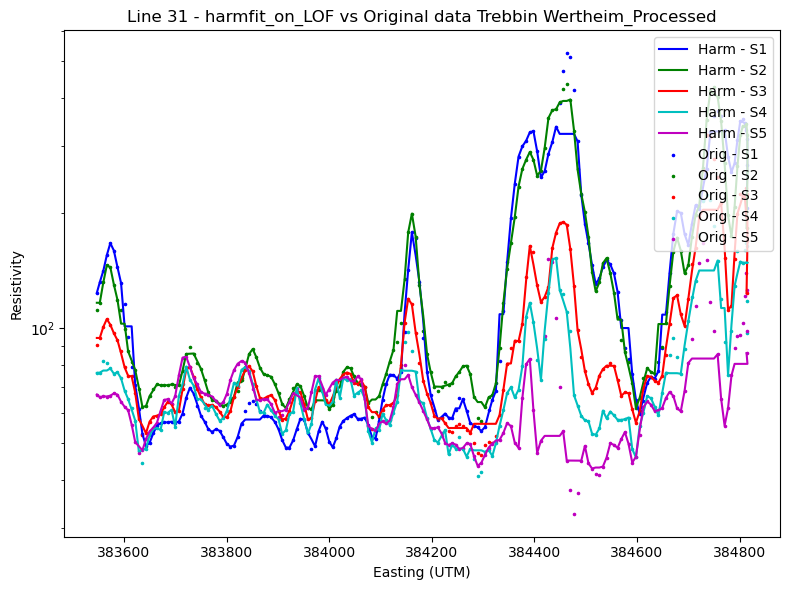

In [31]:
# Define file paths and farm names
# Call the function to compare harmfit on LOF vs original
data_type_LOF = 'LOF'
data_processor.plot_harmfit_vs_original(data_lineIndexed_file, farmName_Original, data_type_LOF)